## ETRI 공공 인공지능 - 객체검출 API

In [4]:
import requests, json, base64

openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"
with open('keys/etriAiKey.txt') as f:
    accessKey = f.read()

In [6]:
img_file = 'data/개_고양이.jpg'
with open(img_file, 'rb') as f:
    img_content = base64.b64encode(f.read()).decode("utf8")
img_type = img_file.split('.')[-1]
img_content[:10]

'/9j/4AAQSk'

In [7]:
headers={"Content-Type": "application/json; charset=UTF-8","Authorization": accessKey}
requestJson = {"argument": {"type": img_type, "file": img_content}}

In [17]:
result = requests.post(
    openApiURL, headers=headers, data=json.dumps(requestJson)
).json()
result

{'result': 0,
 'return_object': {'data': [{'class': 'cat',
    'confidence': '0.997267',
    'x': '303',
    'y': '190',
    'width': '226',
    'height': '294'},
   {'class': 'dog',
    'confidence': '0.996237',
    'x': '40',
    'y': '38',
    'width': '263',
    'height': '446'}]}}

In [9]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'cat',
 'confidence': '0.997267',
 'x': '303',
 'y': '190',
 'width': '226',
 'height': '294'}

- 시각화

In [10]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

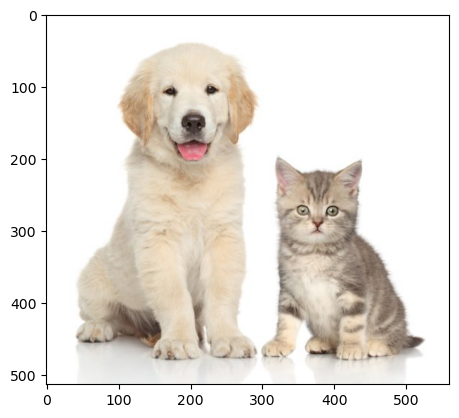

In [11]:
img = Image.open(img_file)
plt.imshow(img);

In [13]:
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('malgun.ttf', 16)
for obj in obj_list:
    name = obj['class']
    x, y = int(obj['x']), int(obj['y'])
    w, h = int(obj['width']), int(obj['height'])
    draw.rectangle(((x,y),(x+w,y+h)), outline=(255,0,0), width=1)
    draw.text((x+10, y+10), name, font=font, fill=(255,0,0))

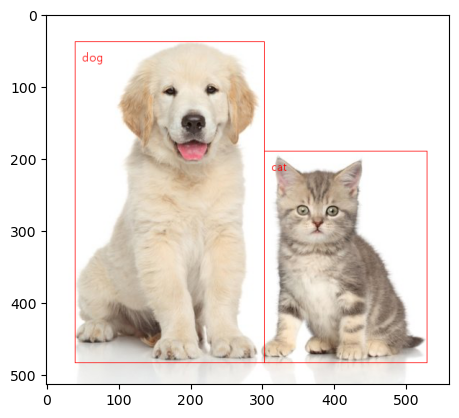

In [15]:
plt.imshow(img);

- street.jpg

In [16]:
img_file = 'data/street.jpg'
with open(img_file, 'rb') as f:
    img_content = base64.b64encode(f.read()).decode("utf8")
img_type = img_file.split('.')[-1]

In [18]:
requestJson = {"argument": {"type": img_type, "file": img_content}}
result = requests.post(
    openApiURL, headers=headers, data=json.dumps(requestJson)
).json()
obj_list = result['return_object']['data']

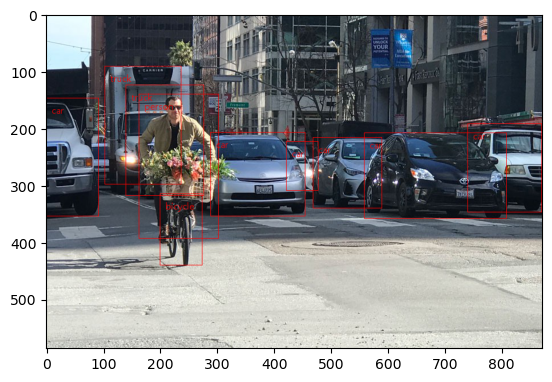

In [19]:
img = Image.open(img_file)
draw = ImageDraw.Draw(img)
font = ImageFont.truetype('malgun.ttf', 16)
for obj in obj_list:
    name = obj['class']
    x, y = int(obj['x']), int(obj['y'])
    w, h = int(obj['width']), int(obj['height'])
    draw.rectangle(((x,y),(x+w,y+h)), outline=(255,0,0), width=1)
    draw.text((x+10, y+10), name, font=font, fill=(255,0,0))
plt.imshow(img);

- meme.jpg

In [20]:
img_file = 'data/meme.jpg'
with open(img_file, 'rb') as f:
    img_content = base64.b64encode(f.read()).decode("utf8")
img_type = img_file.split('.')[-1]

In [21]:
requestJson = {"argument": {"type": img_type, "file": img_content}}
result = requests.post(
    openApiURL, headers=headers, data=json.dumps(requestJson)
).json()
obj_list = result['return_object']['data']

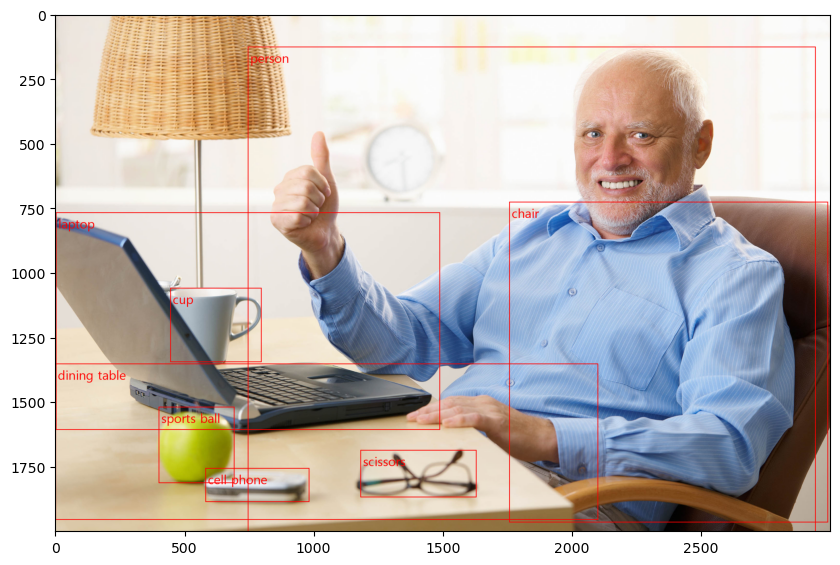

In [25]:
img = Image.open(img_file)
draw = ImageDraw.Draw(img)
size = img.width + img.height
font_size = 16 if size < 1600 else \
                32 if size < 3000 else 48
line_width = 1 if size < 1600 else 2 if size < 3200 else 3
font = ImageFont.truetype('malgun.ttf', font_size)
for obj in obj_list:
    name = obj['class']
    x, y = int(obj['x']), int(obj['y'])
    w, h = int(obj['width']), int(obj['height'])
    draw.rectangle(((x,y),(x+w,y+h)), outline=(255,0,0), width=line_width)
    draw.text((x+10, y+10), name, font=font, fill=(255,0,0))
plt.figure(figsize=(10,8)), plt.imshow(img);